In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from scipy.stats import ttest_ind
import xarray as xr
import matplotlib as mpl

In [2]:
ds = xr.open_dataset("/Users/ncolombi/Desktop/ensemble_members/combined_variables_tcpi/THERMODYNAMICS_scneario_ensembles.nc")
ds

<xarray.Dataset> Size: 348MB
Dimensions:   (scenario: 2, ENS: 5, month: 12, lat: 90, lon: 144, p: 17)
Coordinates:
  * lon       (lon) float64 1kB -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat       (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    st_ocean  float64 8B ...
  * p         (p) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Dimensions without coordinates: scenario, ENS
Data variables: (12/15)
    sst       (scenario, ENS, month, lat, lon) float32 6MB ...
    t         (scenario, ENS, month, p, lat, lon) float32 106MB ...
    q         (scenario, ENS, month, p, lat, lon) float32 106MB ...
    msl       (scenario, ENS, month, lat, lon) float32 6MB ...
    t0        (scenario, ENS, month, lat, lon) float64 12MB ...
    otl       (scenario, ENS, month, lat, lon) float64 12MB ...
    ...        ...
    eff       (scenario, ENS, month, lat, lon) float64 12MB ...
    diseq     (scenario, ENS, month, lat, lon) float64 12MB ...
    lnpi      (scenario, ENS, month, lat, lon) float64 12MB ...
    lneff     (scenario, ENS, month, lat, lon) float64 12MB ...
    lndiseq   (scenario, ENS, month, lat, lon) float64 12MB ...
    lnCKCD    (scenario, ENS) float64 80B ...

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/

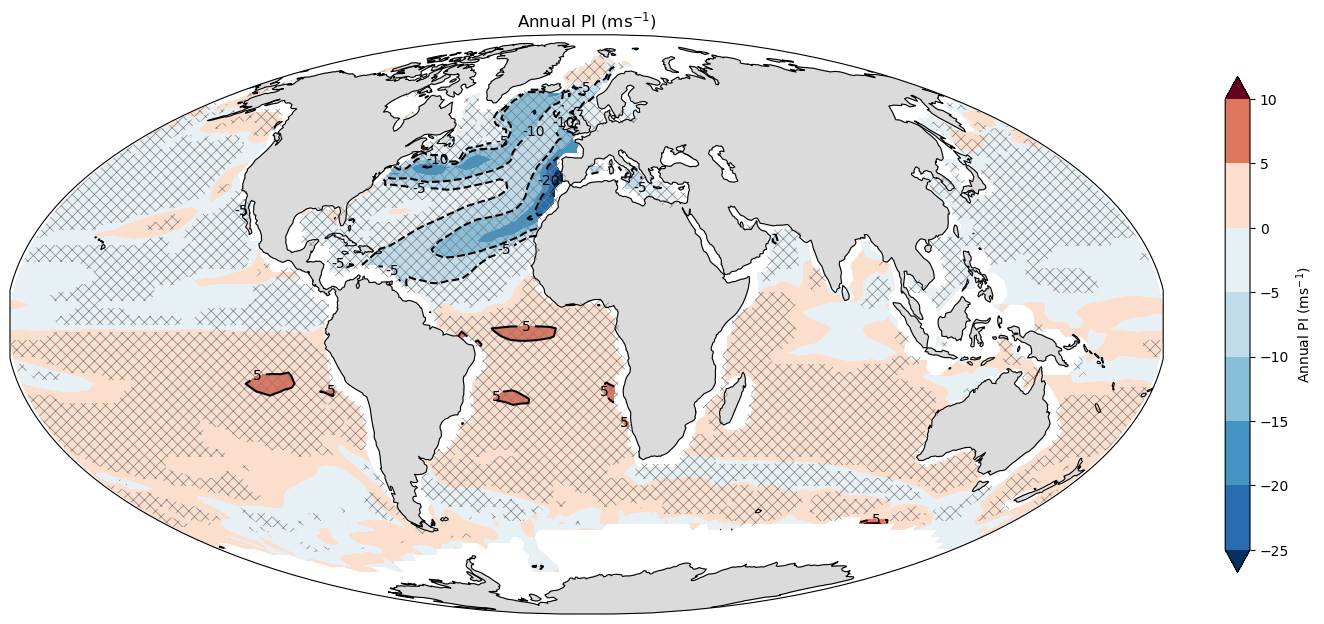

In [3]:
# Perform t-test between hosing and non-hosing
non_hosing = ds.isel(scenario=0).mean(dim="month").vmax
hosing = ds.isel(scenario=1).mean(dim="month").vmax
t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
sig_mask = p_values < 0.01

diff = hosing - non_hosing
vmin, vmax = diff.min().item(), diff.max().item()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "RdBu_r"
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = 'gray'


fig, ax = plt.subplots( figsize=(16, 10), subplot_kw={"projection": ccrs.Mollweide()})

ens_mean = diff.mean(dim="ENS")

# plot data
im = ax.contourf(diff.lon,
                 diff.lat,
                 ens_mean,
                 transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 norm=norm,
                 extend = "both")

# plot significance 
ax.contourf(
    diff.lon, diff.lat, sig_mask,
    hatches=['','xxx'],
    colors='none',
    transform=ccrs.PlateCarree(),
)


# plot contour lines
contours_line = ax.contour(diff.lon,
                           diff.lat,
                           ens_mean,
                           levels = [-20,-10,-5,5],
                           transform=ccrs.PlateCarree(),
                           colors = 'k',
                           norm=norm
                           )
ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

# Set label rotation to horizontal
for txt in contours_line.labelTexts:
    txt.set_rotation(0)

# plot land 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)


ax.set_title('Annual PI (ms$^{-1}$)')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, fraction=0.02)
cbar.set_label('Annual PI (ms$^{-1}$)') 

# plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/Potential_intensity",dpi=700)

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages

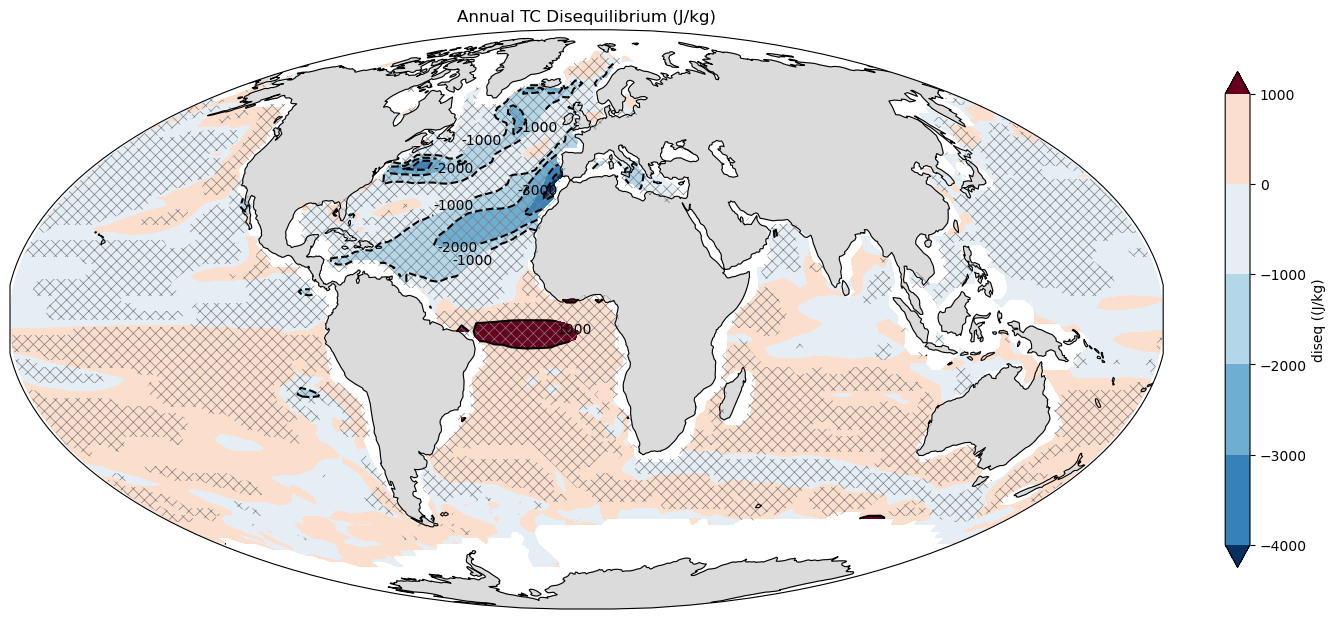

In [86]:
# Perform t-test between hosing and non-hosing
non_hosing = ds.isel(scenario=0).mean(dim="month").diseq
hosing = ds.isel(scenario=1).mean(dim="month").diseq
t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
sig_mask = p_values < 0.01

diff = hosing - non_hosing
vmin, vmax = diff.min().item(), diff.max().item()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "RdBu_r"
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = 'gray'

fig, ax = plt.subplots( figsize=(16, 10), subplot_kw={"projection": ccrs.Mollweide()})

ens_mean = diff.mean(dim="ENS")

# plot data
im = ax.contourf(diff.lon,
                 diff.lat,
                 ens_mean,
                 transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 norm=norm,
                 extend = "both")

# plot significance 
ax.contourf(
    diff.lon, diff.lat, sig_mask,
    hatches=['','xxx'],
    colors='none',
    transform=ccrs.PlateCarree(),
)


# plot contour lines
contours_line = ax.contour(diff.lon,
                           diff.lat,
                           ens_mean,
                           levels = [-4000,-3000,-2000,-1000,1000],
                           transform=ccrs.PlateCarree(),
                           colors = 'k',
                           norm=norm
                           )
ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

# Set label rotation to horizontal
for txt in contours_line.labelTexts:
    txt.set_rotation(0)

# plot land 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)


ax.set_title('Annual TC Disequilibrium (J/kg)')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, fraction=0.02)
cbar.set_label('diseq ((J/kg)') 

# plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/disequilibrium",dpi=700)

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages

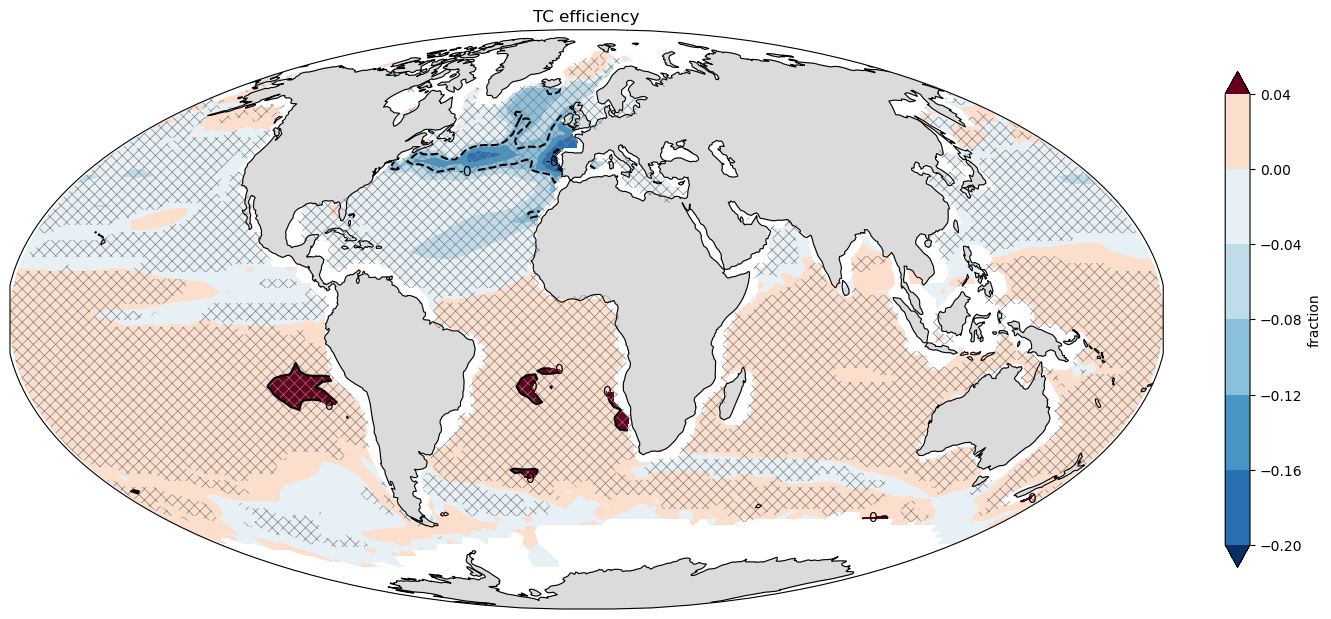

In [89]:
# Perform t-test between hosing and non-hosing
non_hosing = ds.isel(scenario=0).mean(dim="month").eff
hosing = ds.isel(scenario=1).mean(dim="month").eff
t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
sig_mask = p_values < 0.01

diff = hosing - non_hosing
vmin, vmax = diff.min().item(), diff.max().item()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "RdBu_r"
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = 'gray'

fig, ax = plt.subplots( figsize=(16, 10), subplot_kw={"projection": ccrs.Mollweide()})

ens_mean = diff.mean(dim="ENS")

# plot data
im = ax.contourf(diff.lon,
                 diff.lat,
                 ens_mean,
                 transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 norm=norm,
                 extend = "both")

# plot significance 
ax.contourf(
    diff.lon, diff.lat, sig_mask,
    hatches=['','xxx'],
    colors='none',
    transform=ccrs.PlateCarree(),
)


# plot contour lines
contours_line = ax.contour(diff.lon,
                           diff.lat,
                           ens_mean,
                           levels = [-0.20,-0.10,0.04],
                           transform=ccrs.PlateCarree(),
                           colors = 'k',
                           norm=norm
                           )
ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

# Set label rotation to horizontal
for txt in contours_line.labelTexts:
    txt.set_rotation(0)

# plot land 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)


ax.set_title('TC efficiency')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, fraction=0.02)
cbar.set_label('fraction') 

plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/efficiency",dpi=700)

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages

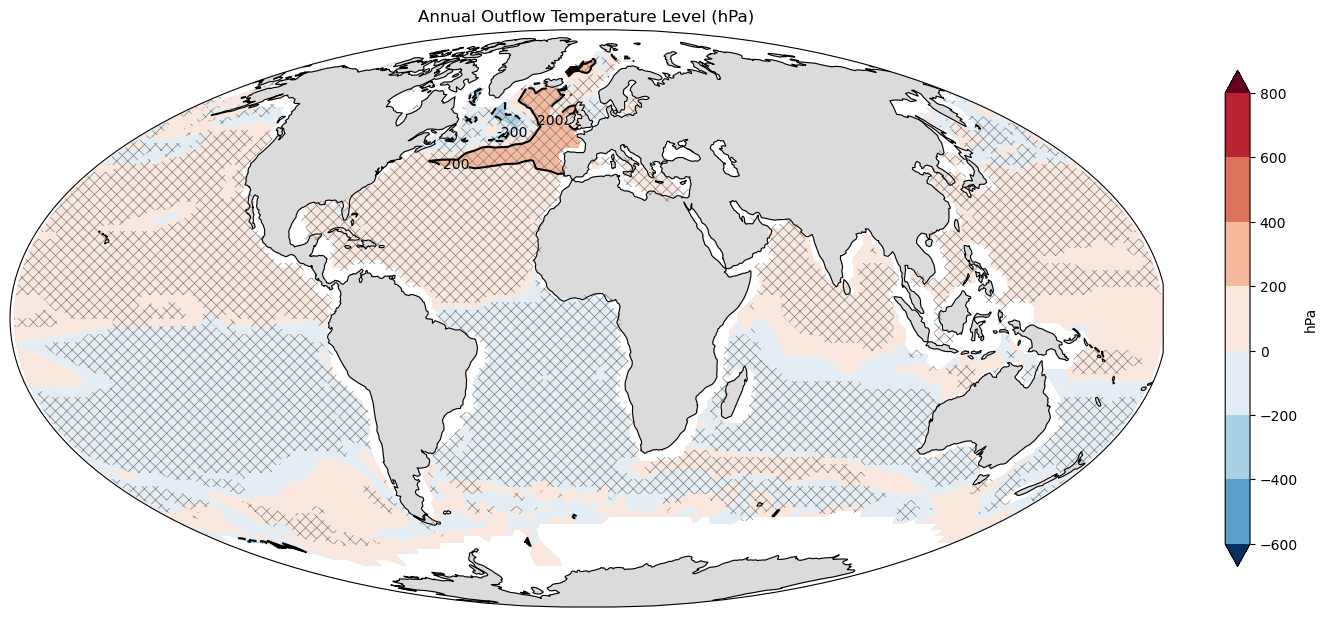

In [97]:
# Perform t-test between hosing and non-hosing
non_hosing = ds.isel(scenario=0).mean(dim="month").otl
hosing = ds.isel(scenario=1).mean(dim="month").otl
t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
sig_mask = p_values < 0.01

diff = hosing - non_hosing
vmin, vmax = diff.min().item(), diff.max().item()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "RdBu_r"
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = 'gray'

fig, ax = plt.subplots( figsize=(16, 10), subplot_kw={"projection": ccrs.Mollweide()})

ens_mean = diff.mean(dim="ENS")

# plot data
im = ax.contourf(diff.lon,
                 diff.lat,
                 ens_mean,
                 transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 norm=norm,
                 extend = "both")

# plot significance 
ax.contourf(
    diff.lon, diff.lat, sig_mask,
    hatches=['','xxx'],
    colors='none',
    transform=ccrs.PlateCarree(),
)


# plot contour lines
contours_line = ax.contour(diff.lon,
                           diff.lat,
                           ens_mean,
                           levels = [-600,-400,-200,200,400,600,800],
                           transform=ccrs.PlateCarree(),
                           colors = 'k',
                           norm=norm
                           )
ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

# Set label rotation to horizontal
for txt in contours_line.labelTexts:
    txt.set_rotation(0)

# plot land 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)


ax.set_title('Annual Outflow Temperature Level (hPa)')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, fraction=0.02)
cbar.set_label('hPa') 

plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/Annual_outflow_temperature_level",dpi=700)

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages

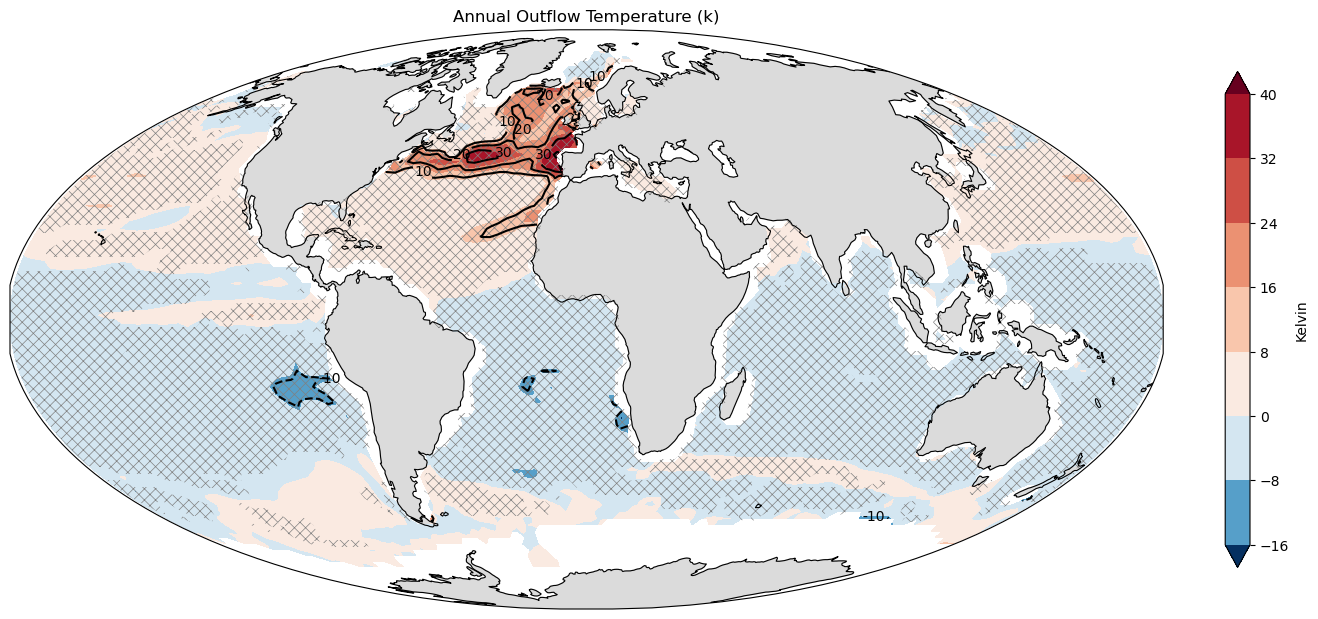

In [101]:
# Perform t-test between hosing and non-hosing
non_hosing = ds.isel(scenario=0).mean(dim="month")["t0"]
hosing = ds.isel(scenario=1).mean(dim="month")["t0"]
t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
sig_mask = p_values < 0.01

diff = hosing - non_hosing
vmin, vmax = diff.min().item(), diff.max().item()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "RdBu_r"
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = 'gray'

fig, ax = plt.subplots( figsize=(16, 10), subplot_kw={"projection": ccrs.Mollweide()})

ens_mean = diff.mean(dim="ENS")

# plot data
im = ax.contourf(diff.lon,
                 diff.lat,
                 ens_mean,
                 transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 norm=norm,
                 extend = "both")

# plot significance 
ax.contourf(
    diff.lon, diff.lat, sig_mask,
    hatches=['','xxx'],
    colors='none',
    transform=ccrs.PlateCarree(),
)


# plot contour lines
contours_line = ax.contour(diff.lon,
                           diff.lat,
                           ens_mean,
                           levels = [-10,10,20,30,40],
                           transform=ccrs.PlateCarree(),
                           colors = 'k',
                           norm=norm
                           )
ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

# Set label rotation to horizontal
for txt in contours_line.labelTexts:
    txt.set_rotation(0)

# plot land 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)


ax.set_title('Annual Outflow Temperature (k)')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, fraction=0.02)
cbar.set_label('Kelvin') 

# plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/Annual_outflow_temperature",dpi=700)

/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/ncolombi/miniforge3/envs/climada_dev/lib/pytho

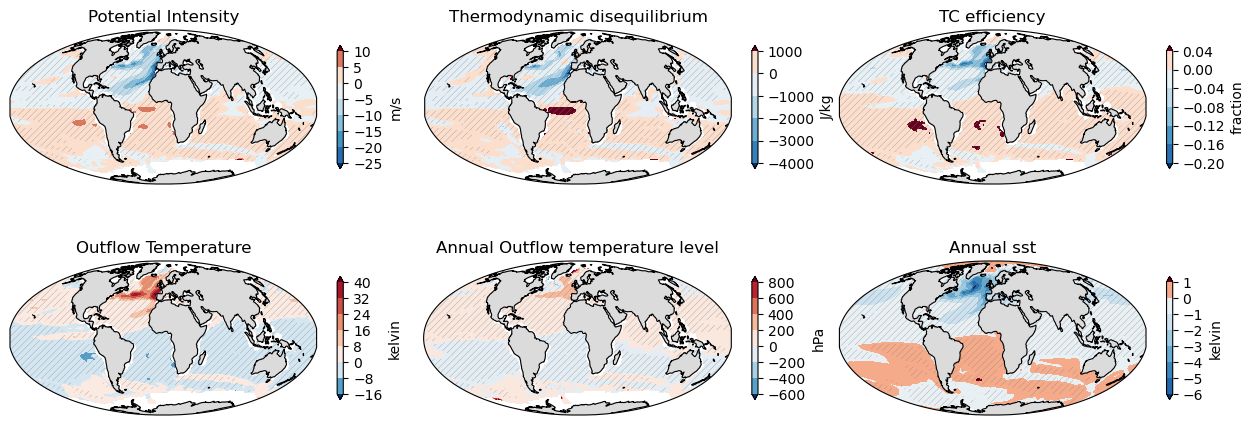

In [128]:

VARIABLES = ["vmax","diseq","eff","t0","otl","sst"]
LABELS = ["Potential Intensity", "Thermodynamic disequilibrium","TC efficiency","Outflow Temperature","Annual Outflow temperature level","Annual sst"]
UNITS = ["m/s","J/kg","fraction","kelvin","hPa","kelvin"]
LEVELS = [[-20,-10,-5,5],[-4000,-3000,-2000,-1000,1000],[-0.20,-0.10,0.04],[-10,10,20,30,40],[-600,-400,-200,200,400],[-5,-3,-1,1]]
mpl.rcParams['hatch.linewidth'] = 0.2
mpl.rcParams['hatch.color'] = 'gray'
cmap = "RdBu_r"

fig, axes = plt.subplots(
    2, 3,
    figsize=(16, 5),
    subplot_kw={"projection": ccrs.Mollweide()},
    gridspec_kw=dict(wspace=0.01, hspace=0.5))

axes = axes.flatten()

for ax, variable,label,unit,levels in zip(axes,VARIABLES,LABELS,UNITS,LEVELS):

    ax.set_title(label)

    # Perform t-test between hosing and non-hosing
    non_hosing = ds.isel(scenario=0).mean(dim="month")[variable]
    hosing = ds.isel(scenario=1).mean(dim="month")[variable]
    t_stat, p_values = ttest_ind(hosing, non_hosing, axis=0, equal_var=False)
    sig_mask = p_values < 0.01

    diff = hosing - non_hosing
    vmin, vmax = diff.min().item(), diff.max().item()
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    ens_mean = diff.mean(dim="ENS")

    # plot data
    im = ax.contourf(diff.lon,
                    diff.lat,
                    ens_mean,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap,
                    norm=norm,
                    extend = "both")

    # plot significance 
    ax.contourf(
        diff.lon, diff.lat, sig_mask,
        hatches=['','/////'],
        colors='none',
        transform=ccrs.PlateCarree(),
    )


    # # plot contour lines
    # contours_line = ax.contour(diff.lon,
    #                         diff.lat,
    #                         ens_mean,
    #                         levels = levels,
    #                         transform=ccrs.PlateCarree(),
    #                         colors = 'k',
    #                         norm=norm
    #                         )
    # ax.clabel(contours_line, inline=True, fontsize=10, fmt="%.0f", use_clabeltext=True)

    # # Set label rotation to horizontal
    # for txt in contours_line.labelTexts:
    #     txt.set_rotation(0)

    # plot land 
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.LAND, color='lightgrey', alpha=0.8)

    # Add colorbar to each subplot
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.8)
    cbar.set_label(unit)  # Adjust units based on variable if needed
    
plt.savefig("/Users/ncolombi/Desktop/figures_AMOC/thermodynamic_variables/all_variables",dpi=1000)

In [12]:
import pickle

monlabels=['J','F','M','A','M','J','J','A','S','O','N','D']

# Replace 'file.pkl' with your actual file path
with open('data/mdr.pk1', 'rb') as f:
    basins = pickle.load(f)


In [22]:
full_ds = ds.isel(scenario=0).mean(dim="ENS")

In [23]:
# calculate the latitude weighting
weights = np.cos(np.deg2rad(full_ds.lat))
weights.name = "weights"
# example: apply weighting to calculate global seasonal averages
full_ds.vmax.weighted(weights).mean(("lon", "lat"));

In [24]:
# define the function to calculate basin averaged variables
def basin_avg(dat_array, basin_dict):
    # Extract bounds
    lat_min = min(basin_dict.bounds.values[0, 0], basin_dict.bounds.values[1, 0])
    lat_max = max(basin_dict.bounds.values[0, 0], basin_dict.bounds.values[1, 0])
    lon_min = min(basin_dict.bounds.values[0, 1], basin_dict.bounds.values[1, 1])
    lon_max = max(basin_dict.bounds.values[0, 1], basin_dict.bounds.values[1, 1])

    # Confirm longitude range consistency
    if dat_array.lon.max() > 180:
        # If data is in 0–360, convert bounds if needed
        if lon_min < 0: lon_min = (lon_min + 360) % 360
        if lon_max < 0: lon_max = (lon_max + 360) % 360

    # Perform slicing
    var_slice = dat_array.sel(
        lon=slice(lon_min, lon_max),
        lat=slice(lat_min, lat_max)
    )

    # Ensure weights are correctly aligned
    weights = np.cos(np.deg2rad(var_slice.lat))

    # Compute weighted mean
    return var_slice.weighted(weights).mean(("lon", "lat"))

In [26]:
# ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# create a dictionary to store results
meanb={}
# calculate basin averages for each basin and variable#
# loop over the variables
for j in full_ds.keys():
    # only run analyses on the month/lat/lon variables
    if (full_ds[j].ndim==3) and (full_ds[j].name!='ifl'):
        # loop over the basins
        hold={}
        for b in basins.keys():
            _output=basin_avg(full_ds[j],basins[b])
            hold[b]=_output
            # store the variables
        meanb[j]=hold
        # store the variable names
        meanb[j]['name'] = getattr(full_ds[j], 'standard_name', j) 
        # ignore units for log variables, else store them
        if (full_ds[j].name[:2]!='ln'):
            meanb[j]['units']=getattr(full_ds[j], 'units', j) 
        del hold

In [ ]:
# define the function to plot the seasonal cycle of a variable
def plot_pi_seascycle(var_want,meanb,basin_dict,ax):
  
    mongrid=np.linspace(1,12,12)
    for k in basins.keys():
        ax.plot(mongrid,meanb[var_want][k],lw=4,color=str(basins[k].color.values),label=str(basins[k].shortname.values))
    
    ax.set_xlim([0.75, 12.25])
    ax.set_xticks(mongrid)
    ax.set_xticklabels(monlabels)
    ax.set_xlabel('Month')
    ax.set_ylabel(meanb[var_want]['name']+' ('+meanb[var_want]['units']+')',fontsize=12)
    ax.set_title(f"Seasonal Mean {meanb[var_want]['name']} ({meanb[var_want].get('units', '')})", fontsize=16)
    ax.legend(fontsize=12, loc='best')
    ax.grid(True)
    return None

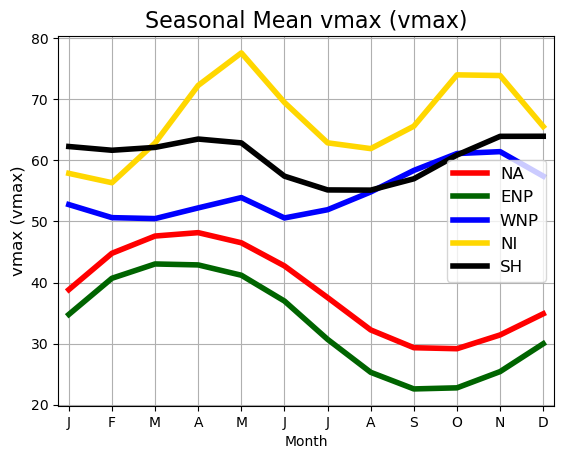

In [ ]:

fig, ax = plt.subplots(2,3)
ax = ax.flatten()

plot_pi_seascycle('vmax',meanb,basins)
plot_pi_seascycle('t0',meanb,basins)
plot_pi_seascycle('eff',meanb,basins)
plot_pi_seascycle('diseq',meanb,basins)
plot_pi_seascycle('otl',meanb,basins)